In [2]:
# Pricing Inefficiencies in Professional Tennis Match Odds
## Data Loading and Initial Exploration

This notebook loads and explores historical ATP match data from the 2024 season.
The goal is to understand the structure, key variables, and data quality before
any feature engineering or probabilistic modelling.


SyntaxError: invalid syntax (1756651105.py, line 4)

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("../data/raw/2024matches.csv")


In [45]:
df.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2024-0339,Brisbane,Hard,32,A,20240101,300,105777,2.0,NaN,...,58.0,44.0,16.0,11.0,8.0,9.0,14.0,2570.0,8.0,3660.0
1,2024-0339,Brisbane,Hard,32,A,20240101,299,208029,1.0,NaN,...,35.0,31.0,10.0,11.0,5.0,7.0,8.0,3660.0,39.0,1122.0
2,2024-0339,Brisbane,Hard,32,A,20240101,298,105777,2.0,NaN,...,39.0,24.0,14.0,10.0,5.0,7.0,14.0,2570.0,55.0,902.0
3,2024-0339,Brisbane,Hard,32,A,20240101,297,208029,1.0,NaN,...,51.0,31.0,16.0,10.0,3.0,5.0,8.0,3660.0,116.0,573.0
4,2024-0339,Brisbane,Hard,32,A,20240101,296,126128,NaN,NaN,...,37.0,27.0,16.0,10.0,5.0,8.0,39.0,1122.0,44.0,1021.0


In [46]:
df.shape

(3076, 49)

In [47]:
df.columns

Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand',
       'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of', 'round',
       'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon',
       'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt',
       'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced',
       'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points'],
      dtype='object')

In [48]:
df.info



<bound method DataFrame.info of                             tourney_id                  tourney_name surface  \
0                            2024-0339                      Brisbane    Hard   
1                            2024-0339                      Brisbane    Hard   
2                            2024-0339                      Brisbane    Hard   
3                            2024-0339                      Brisbane    Hard   
4                            2024-0339                      Brisbane    Hard   
...                                ...                           ...     ...   
3071  2024-M-DC-2024-WG2-PO-URU-MDA-01  Davis Cup WG2 PO: URU vs MDA    Clay   
3072  2024-M-DC-2024-WG2-PO-VIE-RSA-01  Davis Cup WG2 PO: VIE vs RSA    Hard   
3073  2024-M-DC-2024-WG2-PO-VIE-RSA-01  Davis Cup WG2 PO: VIE vs RSA    Hard   
3074  2024-M-DC-2024-WG2-PO-VIE-RSA-01  Davis Cup WG2 PO: VIE vs RSA    Hard   
3075  2024-M-DC-2024-WG2-PO-VIE-RSA-01  Davis Cup WG2 PO: VIE vs RSA    Hard   

      d

In [49]:
df.isna().mean().sort_values(ascending=False).head(10)

winner_entry    0.844928
loser_entry     0.766580
loser_seed      0.753901
winner_seed     0.579324
minutes         0.077373
l_SvGms         0.019831
w_SvGms         0.019831
l_svpt          0.019506
w_svpt          0.019506
w_df            0.019506
dtype: float64

In [50]:
### Initial Observations
- The dataset contains match-level data for ATP matches from the 2024 season
- Each row represents a single match, with winner and loser information stored in separate columns
- The dataset does not contain bookmaker odds; odds data will be sourced separately and merged at a later stage
- Player rankings and other performance-related variables contain missing values
- Match context variables such as surface and tournament level are available


SyntaxError: invalid syntax (4096812804.py, line 2)

In [51]:
### Feature Considerations
- The dataset contains both pre-match contextual variables and post-match performance statistics
- Only variables known prior to match start (e.g. rankings, surface, tournament level) are suitable for probability estimation
- Post-match statistics (e.g. aces, break points, match duration) will be excluded to avoid data leakage
- Match outcomes will be restructured from a winner/loser format into a player/opponent format for modelling


SyntaxError: invalid syntax (3010535469.py, line 2)

In [52]:
# Pre-match contextual columns only
base_cols = [
    "tourney_date", "surface", "tourney_level", "round", "best_of",
    
    "winner_id", "winner_name", "winner_age", "winner_ht",
    "winner_hand", "winner_rank", "winner_rank_points",
    
    "loser_id", "loser_name", "loser_age", "loser_ht",
    "loser_hand", "loser_rank", "loser_rank_points"
]

df_base = df[base_cols].copy()


In [53]:
winner_view = df_base.rename(columns={
    "winner_id": "player_id",
    "winner_name": "player_name",
    "winner_age": "player_age",
    "winner_ht": "player_ht",
    "winner_hand": "player_hand",
    "winner_rank": "player_rank",
    "winner_rank_points": "player_rank_points",
    
    "loser_id": "opp_id",
    "loser_name": "opp_name",
    "loser_age": "opp_age",
    "loser_ht": "opp_ht",
    "loser_hand": "opp_hand",
    "loser_rank": "opp_rank",
    "loser_rank_points": "opp_rank_points"
})

winner_view["win"] = 1


In [54]:
loser_view = df_base.rename(columns={
    "loser_id": "player_id",
    "loser_name": "player_name",
    "loser_age": "player_age",
    "loser_ht": "player_ht",
    "loser_hand": "player_hand",
    "loser_rank": "player_rank",
    "loser_rank_points": "player_rank_points",
    
    "winner_id": "opp_id",
    "winner_name": "opp_name",
    "winner_age": "opp_age",
    "winner_ht": "opp_ht",
    "winner_hand": "opp_hand",
    "winner_rank": "opp_rank",
    "winner_rank_points": "opp_rank_points"
})

loser_view["win"] = 0


In [55]:
df_long = pd.concat([winner_view, loser_view], ignore_index=True)


In [56]:
df_long.shape


(6152, 20)

In [57]:
df_long["win"].value_counts(normalize=True)


win
1    0.5
0    0.5
Name: proportion, dtype: float64

In [58]:
df_long["rank_diff"] = df_long["player_rank"] - df_long["opp_rank"]


In [59]:
df_long["rank_points_diff"] = (
    df_long["player_rank_points"] - df_long["opp_rank_points"]
)


In [60]:
df_long["age_diff"] = df_long["player_age"] - df_long["opp_age"]


In [61]:
df_long["height_diff"] = df_long["player_ht"] - df_long["opp_ht"]


In [62]:
df_model = df_long.dropna(
    subset=["rank_diff", "rank_points_diff", "age_diff"]
).copy()


In [63]:
df_model[["rank_diff", "age_diff"]].describe()


,rank_diff,age_diff
count,6060.000000,6.060000e+03
mean,0.000000,3.752041e-17
std,167.889107,6.168067e+00
min,-1791.000000,-2.130000e+01
25%,-42.000000,-4.100000e+00
50%,0.000000,0.000000e+00
75%,42.000000,4.100000e+00
max,1791.000000,2.130000e+01


In [64]:
### Feature Validation
Summary statistics for engineered features indicate symmetric distributions centred around zero, 
as expected given the player–opponent construction. Ranking differences show a wide spread, reflecting variation in competitive matchups, 
while age differences are more tightly distributed. No implausible values were observed, 
suggesting the engineered features are suitable for probabilistic modelling.


SyntaxError: invalid character '–' (U+2013) (866316232.py, line 3)

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt


In [66]:
features = [
    "rank_diff",
    "rank_points_diff",
    "age_diff"
]

X = df_model[features]
y = df_model["win"]


In [67]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=42
)


In [68]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [69]:
y_test_proba = model.predict_proba(X_test)[:, 1]


In [70]:
pd.Series(y_test_proba).describe()


count    1515.000000
mean        0.499896
std         0.167898
min         0.030013
25%         0.414264
50%         0.498275
75%         0.582772
max         0.965779
dtype: float64

In [71]:
coef_df = pd.DataFrame({
    "feature": features,
    "coefficient": model.coef_[0]
}).sort_values(by="coefficient")

coef_df


,feature,coefficient
2,age_diff,-0.017315
0,rank_diff,-0.001236
1,rank_points_diff,0.000308


In [72]:
eval_df = pd.DataFrame({
    "predicted_proba": y_test_proba,
    "actual_win": y_test.values
})


In [73]:
eval_df["proba_bin"] = pd.cut(
    eval_df["predicted_proba"],
    bins=np.linspace(0, 1, 11)
)


In [74]:
calibration_df = (
    eval_df
    .groupby("proba_bin")
    .agg(
        mean_predicted_proba=("predicted_proba", "mean"),
        observed_win_rate=("actual_win", "mean"),
        count=("actual_win", "size")
    )
    .reset_index()
)

calibration_df


/var/folders/01/qv4xytw16jx4074h1n3f68km0000gn/T/ipykernel_8209/2328700082.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("proba_bin")


,proba_bin,mean_predicted_proba,observed_win_rate,count
0,"(0.0, 0.1]",0.069960,0.000000,30
1,"(0.1, 0.2]",0.155143,0.068182,44
2,"(0.2, 0.3]",0.256634,0.197802,91
3,"(0.3, 0.4]",0.359690,0.426829,164
4,"(0.4, 0.5]",0.454168,0.468182,440
5,"(0.5, 0.6]",0.544027,0.567961,412
6,"(0.6, 0.7]",0.638525,0.660819,171
7,"(0.7, 0.8]",0.744657,0.759494,79
8,"(0.8, 0.9]",0.850122,0.800000,50
9,"(0.9, 1.0]",0.928796,0.941176,34


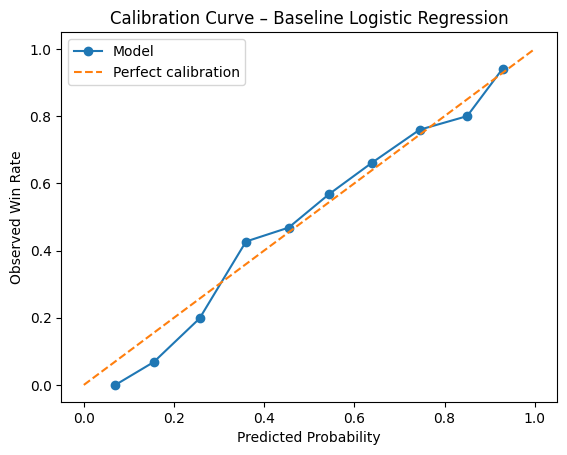

In [75]:
plt.figure()
plt.plot(
    calibration_df["mean_predicted_proba"],
    calibration_df["observed_win_rate"],
    marker="o",
    label="Model"
)

plt.plot([0, 1], [0, 1], linestyle="--", label="Perfect calibration")

plt.xlabel("Predicted Probability")
plt.ylabel("Observed Win Rate")
plt.title("Calibration Curve – Baseline Logistic Regression")
plt.legend()
plt.show()


In [76]:
### Baseline Probability Model

#A logistic regression model was trained to estimate match win probabilities using relative ranking and age differences. 
    #Calibration analysis on held-out data indicates that the model is reasonably well calibrated across most probability ranges, 
    #with deviations at extreme probabilities likely driven by smaller sample sizes. 
    #This provides a transparent baseline for evaluating pricing accuracy in professional tennis matches.


SyntaxError: invalid syntax (3611909174.py, line 3)

In [79]:
odds_df = pd.read_csv("../data/raw/2024.atp.odds.csv")

In [78]:
### 

#Loading in dataset containing odds data, in order to merge and use our model 

SyntaxError: invalid syntax (729221840.py, line 3)

In [80]:
odds_df.head()

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,Lsets,Comment,B365W,B365L,PSW,PSL,MaxW,MaxL,AvgW,AvgL
0,1,Brisbane,Brisbane International,31/12/2023,ATP250,Outdoor,Hard,1st Round,3,Popyrin A.,...,1.0,Completed,1.62,2.30,1.72,2.23,1.77,2.32,1.68,2.17
1,1,Brisbane,Brisbane International,31/12/2023,ATP250,Outdoor,Hard,1st Round,3,Shevchenko A.,...,0.0,Completed,1.62,2.30,1.78,2.14,1.78,2.32,1.70,2.14
2,1,Brisbane,Brisbane International,01/01/2024,ATP250,Outdoor,Hard,1st Round,3,Safiullin R.,...,1.0,Completed,2.30,1.62,2.31,1.68,2.32,1.68,2.24,1.63
3,1,Brisbane,Brisbane International,01/01/2024,ATP250,Outdoor,Hard,1st Round,3,Rune H.,...,1.0,Completed,1.25,4.00,1.32,3.68,1.32,4.01,1.28,3.65
4,1,Brisbane,Brisbane International,01/01/2024,ATP250,Outdoor,Hard,1st Round,3,Dimitrov G.,...,1.0,Completed,1.33,3.40,1.35,3.47,1.36,3.50,1.33,3.25


In [81]:
odds_df.columns

Index(['ATP', 'Location', 'Tournament', 'Date', 'Series', 'Court', 'Surface',
       'Round', 'Best of', 'Winner', 'Loser', 'WRank', 'LRank', 'WPts', 'LPts',
       'W1', 'L1', 'W2', 'L2', 'W3', 'L3', 'W4', 'L4', 'W5', 'L5', 'Wsets',
       'Lsets', 'Comment', 'B365W', 'B365L', 'PSW', 'PSL', 'MaxW', 'MaxL',
       'AvgW', 'AvgL'],
      dtype='object')

In [84]:
odds_df[["Winner","Loser","B365W","B365L"]].head()

,Winner,Loser,B365W,B365L
0,Popyrin A.,O Connell C.,1.62,2.30
1,Shevchenko A.,Van Assche L.,1.62,2.30
2,Safiullin R.,Shelton B.,2.30,1.62
3,Rune H.,Purcell M.,1.25,4.00
4,Dimitrov G.,Murray A.,1.33,3.40


In [86]:
odds_df["b365_winner_proba"]=1/odds_df["B365W"]
odds_df["b365_loser_proba"]=1/odds_df["B365L"]

In [ ]:
### Turning oddsmaker decimals into raw probabilties to merge with the model 

In [88]:
odds_long = pd.concat([
    odds_df[["Tournament","Date", "Winner", "Loser",
        "b365_winner_proba"
            ]].assign(
        player_name=odds_df["Winner"],
        market_proba=odds_df["b365_winner_proba"],
        win=1),
    odds_df[[
        "Tournament", "Date", "Winner", "Loser",
        "b365_loser_proba"
    ]].assign(
        player_name=odds_df["Loser"],
        market_proba=odds_df["b365_loser_proba"],
        win=0
    )
], ignore_index=True)

In [ ]:
### Splitting each match into winners and losers, then assigning each to their oddsmaker probabilties 

In [89]:
odds_long[["player_name", "market_proba", "win"]].head(6)


,player_name,market_proba,win
0,Popyrin A.,0.617284,1
1,Shevchenko A.,0.617284,1
2,Safiullin R.,0.434783,1
3,Rune H.,0.800000,1
4,Dimitrov G.,0.751880,1
5,Hanfmann Y.,0.222222,1


In [ ]:
## Checking splitting has worked 

In [90]:
odds_long["win"].value_counts()


win
1    2703
0    2703
Name: count, dtype: int64

In [ ]:
### Succesfully split; equal count for 1 and 0 values i.e every match accounted for 

In [91]:
odds_long[["player_name", "market_proba", "win"]].tail(6)


,player_name,market_proba,win
5400,Medvedev D.,0.200000,0
5401,Alcaraz C.,0.523560,0
5402,Rublev A.,0.653595,0
5403,Zverev A.,0.714286,0
5404,Ruud C.,0.090909,0
5405,Fritz T.,0.181818,0


In [ ]:
### Checking the end of the dataset, pd.concat assigns losers to the end of the dataset so making sure this has gone to plan 

In [92]:
odds_long.groupby("win")["market_proba"].mean()


win
0    0.428617
1    0.623052
Name: market_proba, dtype: float64

In [ ]:
## Final check, if splitting has worked succesfully mean odds should be higher for winners than losers. 
#Winners: 1: 0.623..
#Losers: 0: 0.428..

In [ ]:
### Now we prepare model for data merging

In [93]:
df_model.columns


Index(['tourney_date', 'surface', 'tourney_level', 'round', 'best_of',
       'player_id', 'player_name', 'player_age', 'player_ht', 'player_hand',
       'player_rank', 'player_rank_points', 'opp_id', 'opp_name', 'opp_age',
       'opp_ht', 'opp_hand', 'opp_rank', 'opp_rank_points', 'win', 'rank_diff',
       'rank_points_diff', 'age_diff', 'height_diff'],
      dtype='object')

In [94]:
merged_df = df_model.merge(
    odds_long[["player_name", "market_proba", "win"]],
    on=["player_name", "win"],
    how="inner"
)


In [ ]:
### To merge we want rows where model probabiltiy and market probabilties exist 


In [95]:
merged_df[["player_name", "win", "market_proba"]].head()
merged_df.shape


(0, 25)

In [ ]:
## Debug 1 - Have run into the issue of different naming conventions in the different datasets. Will now find the cause

In [96]:
df_model["player_name"].head(10)


0    Grigor Dimitrov
1        Holger Rune
2    Grigor Dimitrov
3        Holger Rune
4    Roman Safiullin
5    Jordan Thompson
6    Grigor Dimitrov
7        Holger Rune
8    James Duckworth
9    Roman Safiullin
Name: player_name, dtype: object

In [97]:
odds_long["player_name"].head(10)


0       Popyrin A.
1    Shevchenko A.
2     Safiullin R.
3          Rune H.
4      Dimitrov G.
5      Hanfmann Y.
6         Klein L.
7     Duckworth J.
8      Altmaier D.
9        Machac T.
Name: player_name, dtype: object

In [ ]:
## Debug - Clearly naming conventions are different in the two data sets 

In [98]:
set(df_model["player_name"]).intersection(
    set(odds_long["player_name"])
)


set()

In [ ]:
### A return of set() confirms the issue is naming convention 

In [ ]:
### Will now create a match ID for both datasets in order to merge efficiently. We will use different variables to ID each match to each other

In [105]:
df_long.columns


Index(['tourney_date', 'surface', 'tourney_level', 'round', 'best_of',
       'player_id', 'player_name', 'player_age', 'player_ht', 'player_hand',
       'player_rank', 'player_rank_points', 'opp_id', 'opp_name', 'opp_age',
       'opp_ht', 'opp_hand', 'opp_rank', 'opp_rank_points', 'win', 'rank_diff',
       'rank_points_diff', 'age_diff', 'height_diff'],
      dtype='object')

In [ ]:
## By using "tourney_date" "round" "player_id" "opp_id" we can match the games together given every match appears twice in the datatset.

In [106]:
df_long["match_id"] = (
    df_long["tourney_date"].astype(str)
    + "_" +
    df_long["round"].astype(str)
    + "_" +
    df_long[["player_id", "opp_id"]]
        .astype(str)
        .apply(lambda x: "_".join(sorted(x)), axis=1)
)


In [107]:
### This searches the dataframe for matching values 

In [108]:
df_long.groupby("match_id").size().value_counts()


2    3074
4       1
Name: count, dtype: int64

In [ ]:
## Confirm we have two rows per match

In [109]:
df_model = (
    df_long
    .dropna(subset=["rank_diff", "rank_points_diff", "age_diff"])
    .copy()
)


In [110]:
df_model[["match_id", "player_id", "opp_id", "win"]].head()


,match_id,player_id,opp_id,win
0,20240101_F_105777_208029,105777,208029,1
1,20240101_SF_126128_208029,208029,126128,1
2,20240101_SF_105777_111442,105777,111442,1
3,20240101_QF_105902_208029,208029,105902,1
4,20240101_QF_126128_208286,126128,208286,1


In [111]:
df_model["player_side"] = np.where(
    df_model["win"] == 1,
    "winner",
    "loser"
)


In [ ]:
### Match ID's in df_long have been passed into df.model. 

In [112]:
odds_df[["Winner", "Loser"]].head()


,Winner,Loser
0,Popyrin A.,O Connell C.
1,Shevchenko A.,Van Assche L.
2,Safiullin R.,Shelton B.
3,Rune H.,Purcell M.
4,Dimitrov G.,Murray A.


In [ ]:
### Now we merge odds at the match level in odds_df since we dont have player ID's in this dataset

In [113]:
odds_df["match_id"] = (
    odds_df["Date"].astype(str)
    + "_" +
    odds_df["Round"].astype(str)
    + "_" +
    odds_df[["Winner", "Loser"]]
        .astype(str)
        .apply(lambda x: "_".join(sorted(x)), axis=1)
)


In [114]:
odds_long = pd.concat([
    odds_df.assign(
        player_side="winner",
        market_proba=1 / odds_df["B365W"],
        win=1
    ),
    odds_df.assign(
        player_side="loser",
        market_proba=1 / odds_df["B365L"],
        win=0
    )
], ignore_index=True)


In [ ]:
### Now we merge both datasets into a new dataframe : merged_df

In [115]:
merged_df = df_model.merge(
    odds_long[["match_id", "player_side", "market_proba"]],
    on=["match_id", "player_side"],
    how="inner"
)


In [116]:
merged_df.shape


(0, 27)

In [117]:
merged_df[["market_proba", "win"]].head()


,market_proba,win


In [118]:
merged_df.groupby("win")["market_proba"].mean()


Series([], Name: market_proba, dtype: float64)